In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from imblearn.under_sampling import TomekLinks, ClusterCentroids, RandomUnderSampler, NearMiss
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# LOAD TEST
test = pd.read_csv("data/test_without_cols.csv", sep=";", decimal=',')
X_test = test.drop(['flagimpaye'], axis=1)
Y_test = np.array(test['flagimpaye'])
print("TEST")
sorted(Counter(Y_test).items())

TEST


[(0, 263288), (1, 855)]

In [3]:
# LOAD TRAIN
train = pd.read_csv("data/train_without_cols.csv", sep=";", decimal=',')
X_original_train = train.drop(['flagimpaye'], axis=1)
Y_original_train = np.array(train['flagimpaye'])
print("ORIGINAL TRAIN")
sorted(Counter(Y_original_train).items())

ORIGINAL TRAIN


[(0, 1961824), (1, 5402)]

In [4]:
# RANDOM UNDER SAMPLING
rus = RandomUnderSampler(random_state=15, sampling_strategy={
    0: 534789,  # 99%
    1: 5402     # 1%
})
X_rus, Y_rus = rus.fit_resample(X_original_train, Y_original_train)
print("RANDOM UNDER SAMPLING")
sorted(Counter(Y_rus).items())

RANDOM UNDER SAMPLING


[(0, 534789), (1, 5402)]

In [5]:
# NEAR-MISS UNDER SAMPLING
nm = NearMiss(version=1, sampling_strategy={
    0: 48618,   # 90%
    1: 5402     # 10%
})
X_nm, Y_nm = nm.fit_resample(X_rus, Y_rus)
print("NEAR MISS UNDER SAMPLING")
sorted(Counter(Y_nm).items())

NEAR MISS UNDER SAMPLING


[(0, 48618), (1, 5402)]

In [6]:
# TRAIN MODEL
X_train = np.array(X_nm)
Y_train = Y_nm

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=10)

model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=200)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40    263288
           1       0.00      0.78      0.01       855

    accuracy                           0.25    264143
   macro avg       0.50      0.52      0.20    264143
weighted avg       0.99      0.25      0.40    264143



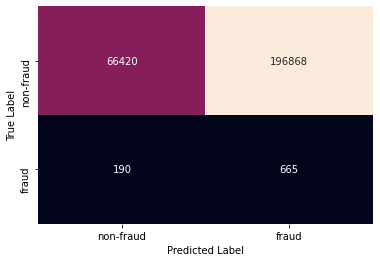

In [8]:
# TEST MODEL
Y_predict = model.predict(X_test)

ax = plt.subplot()
sns.heatmap(confusion_matrix(Y_test, Y_predict), annot=True, ax = ax, fmt='d', cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.xaxis.set_ticklabels(['non-fraud', 'fraud'])
ax.yaxis.set_ticklabels(['non-fraud', 'fraud'])
print(classification_report(Y_test, Y_predict))